In [ ]:
%matplotlib inline


# Plots a Voronoi diagram

This example shows how to plot a Voronoi diagram for a freeze frame.


In [2]:
import matplotlib.pyplot as plt
from mplsoccer import Pitch, Sbopen
import numpy as np

# get freeze frame data for game 3788741
parser = Sbopen()
frames, visible = parser.frame(3788741)

Subset a shot



In [3]:
frame_idx = 50
frame_id = visible.iloc[50].id

visible_area = np.array(visible.iloc[frame_idx].visible_area).reshape(-1, 2)
player_position_data = frames[frames.id == frame_id]

teammate_locs = player_position_data[player_position_data.teammate]
opponent_locs = player_position_data[~player_position_data.teammate]

Plotting



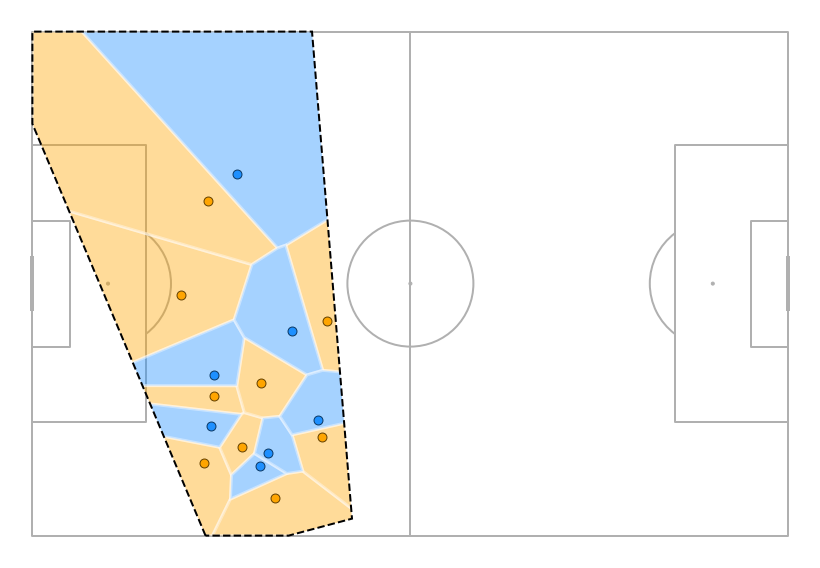

In [4]:
# draw plot
p = Pitch(pitch_type='statsbomb')
fig, ax = p.draw(figsize=(12,8))

# Plot Voronoi
team1, team2 = p.voronoi(player_position_data.x, player_position_data.y,
                         player_position_data.teammate)
t1 = p.polygon(team1, ax=ax, fc='orange', ec='white', lw=3, alpha=0.4)
t2 = p.polygon(team2, ax=ax, fc='dodgerblue', ec='white', lw=3, alpha=0.4)

# Plot players
sc1 = p.scatter(teammate_locs.x, teammate_locs.y, c='orange', s=80, ec='k', ax=ax)
sc2 = p.scatter(opponent_locs.x, opponent_locs.y, c='dodgerblue', s=80, ec='k', ax=ax)

# Plot the visible area
visible = p.polygon([visible_area], color='None', ec='k', linestyle='--', lw=2, ax=ax)

# clip each player to the visible area
for p1 in t1:
    p1.set_clip_path(visible[0])
for p2 in t2:
    p2.set_clip_path(visible[0])

plt.show()  # If you are using a Jupyter notebook you do not need this line